In [1]:
import pandas as pd
import sqlalchemy
import seaborn as sns
import os

In [47]:
CRDC_path = '../Data/2017-18-crdc-data/2017-18 Public-Use Files/Data'
SAIPE_path = '../Data/ussd17.xls'

In [3]:
dataFolders = []
for currentPath, dirs, files in os.walk(CRDC_path):
    if len(dirs) == 0: # we are in deep
        dataFolders.append((currentPath, files))

In [ ]:
engine = sqlalchemy.create_engine('postgresql+psycopg2://postgres:123456789\
@localhost/datathon')
conn = engine.connect()
for folder, files in dataFolders:
    for f in files:
        dpath = os.path.join(folder, f)
        data=pd.read_csv(dpath, encoding ="cp1252").astype(str)
        table_name = "".join(f.split()).strip().replace("-", "_")[:-4]
        data.to_sql(table_name, engine, index=False, schema='crdc')
        if 'SCHID' in data.columns and 'NCESLEAID' in data.columns:
            query = f'''ALTER TABLE crdc."{table_name}" ADD PRIMARY KEY ("NCESLEAID", "SCHID");'''
        elif 'SCHID' in data.columns and 'LEAID' in data.columns:
            query = f'''ALTER TABLE crdc."{table_name}" ADD PRIMARY KEY ("LEAID", "SCHID");'''
        else:
            query = f'''ALTER TABLE crdc."{table_name}" ADD PRIMARY KEY ("LEAID");'''
        try:
            res = conn.execute(sqlalchemy.text(query))
        except Exception as e:
            print(f"{f} could not be assigned a primary key!")
conn.commit()
conn.close()

In [48]:
data = pd.read_csv(dpath, encoding ="cp1252")
saipeData = pd.read_excel(SAIPE_path, skiprows=2, dtype=str)

In [49]:

from sqlalchemy import create_engine
 
engine = create_engine('postgresql+psycopg2://postgres:123456789\
@localhost/datathon')


In [52]:
pd.read_sql("select * from public.saipe", engine)

,State Postal Code,State FIPS Code,District ID,Name,Estimated Total Population,Estimated Population 5-17,Estimated number of relevant children 5 to 17 years old in pove
0,AL,01,00190,Alabaster City School District,34015,6703,860
1,AL,01,00005,Albertville City School District,21786,4115,1546
2,AL,01,00030,Alexander City City School District,17073,2659,832
3,AL,01,00060,Andalusia City School District,8854,1444,386
4,AL,01,00090,Anniston City School District,22350,3184,1106
...,...,...,...,...,...,...,...
13218,WY,56,06240,Washakie County School District 1,7372,1382,181
13219,WY,56,05820,Washakie County School District 2,692,96,4
13220,WY,56,04830,Weston County School District 1,5465,811,118
13221,WY,56,06090,Weston County School District 7,1462,247,12


In [51]:
saipeData.to_sql('saipe', engine, schema='public', index=False)

223

In [62]:
saipeData.insert(3, 'LEAID', saipeData['State FIPS Code'] + saipeData['District ID'])

In [148]:
dataFolders[2]

('../Data/2017-18-crdc-data/2017-18 Public-Use Files/Data/LEA/CRDC/CSV',
 ['LEA Characteristics.csv',
  'Distance Education.csv',
  'High School Equivalency (GED).csv'])

In [152]:
dpath = os.path.join(dataFolders[2][0], dataFolders[2][1][0])
crdc_lea_chars=pd.read_csv(dpath, encoding ="cp1252")

/var/folders/3k/9209wvrn05l53fgm5sjw5xhr0000gn/T/ipykernel_16547/3395514640.py:2: DtypeWarning: Columns (2,6) have mixed types. Specify dtype option on import or set low_memory=False.
  crdc_lea_chars=pd.read_csv(dpath, encoding ="cp1252")


In [54]:
saipeData.head()

,State Postal Code,State FIPS Code,District ID,Name,Estimated Total Population,Estimated Population 5-17,Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder
0,AL,01,00190,Alabaster City School District,34015,6703,860
1,AL,01,00005,Albertville City School District,21786,4115,1546
2,AL,01,00030,Alexander City City School District,17073,2659,832
3,AL,01,00060,Andalusia City School District,8854,1444,386
4,AL,01,00090,Anniston City School District,22350,3184,1106


In [205]:
(crdc_lea_chars['LEAID'] == '5400300').sum()

1

In [204]:
crdc_lea_chars = crdc_lea_chars.astype(str)

In [208]:
crdc_lea_chars.loc[crdc_lea_chars['LEA_NAME'].str.startswith('FAYETTE')]

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,LEA_ADDRESS,LEA_CITY,LEA_ZIP,CJJ,LEA_ENR,LEA_ENR_NONLEAFAC,...,LEA_PSENR_A5,LEA_PSELIG_ALL,LEA_PSELIG_IDEA,LEA_PSELIG_TITLEI,LEA_PSELIG_LOWINC,LEA_KG_IND,LEA_KG_FULLDAYFREE,LEA_KG_FULLDAYCOST,LEA_KG_PARTDAYFREE,LEA_KG_PARTDAYCOST
979,AR,ARKANSAS,0506120,FAYETTEVILLE SCHOOL DISTRICT,1000 W STONE ST,FAYETTEVILLE,72701,No,10017,0,...,-9,-9,-9,-9,-9,Yes,Yes,No,No,No
8571,MO,MISSOURI,2911990,FAYETTE R-III,705 LUCKY,FAYETTE,65248,No,675,0,...,33,No,Yes,Yes,Yes,Yes,Yes,No,No,No
11303,NY,NEW YORK,3618330,FAYETTEVILLE-MANLIUS CENTRAL SCHOOL DISTRICT,8199 E SENECA TPKE,MANLIUS,13104,No,4225,28,...,-9,-9,-9,-9,-9,Yes,Yes,No,No,No
15520,TX,TEXAS,4819140,FAYETTEVILLE ISD,P O BOX 129,FAYETTEVILLE,78940,No,258,0,...,0,Yes,-9,-9,-9,Yes,Yes,No,No,No
17052,WV,WEST VIRGINIA,5400300,FAYETTE COUNTY SCHOOLS,111 FAYETTE AVENUE,FAYETTEVILLE,25840,Yes,6465,286,...,6,Yes,-9,-9,-9,Yes,Yes,No,Yes,No


In [188]:
crdc_lea_chars.astype(str).loc[crdc_lea_chars.astype(str)['LEAID']=='5400300', :]

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,LEA_ADDRESS,LEA_CITY,LEA_ZIP,CJJ,LEA_ENR,LEA_ENR_NONLEAFAC,...,LEA_PSENR_A5,LEA_PSELIG_ALL,LEA_PSELIG_IDEA,LEA_PSELIG_TITLEI,LEA_PSELIG_LOWINC,LEA_KG_IND,LEA_KG_FULLDAYFREE,LEA_KG_FULLDAYCOST,LEA_KG_PARTDAYFREE,LEA_KG_PARTDAYCOST
17052,WV,WEST VIRGINIA,5400300,FAYETTE COUNTY SCHOOLS,111 FAYETTE AVENUE,FAYETTEVILLE,25840,Yes,6465,286,...,6,Yes,-9,-9,-9,Yes,Yes,No,Yes,No


In [220]:
merged_crds_saipe = crdc_lea_chars.astype(str).merge(saipeData.astype(str),on='LEAID', indicator=True, how='outer')

In [42]:
data.loc[:, 'LEA_HSEPART_HI_M':].corr()

,LEA_HSEPART_HI_M,LEA_HSEPART_HI_F,LEA_HSEPART_AM_M,LEA_HSEPART_AM_F,LEA_HSEPART_AS_M,LEA_HSEPART_AS_F,LEA_HSEPART_HP_M,LEA_HSEPART_HP_F,LEA_HSEPART_BL_M,LEA_HSEPART_BL_F,LEA_HSEPART_WH_M,LEA_HSEPART_WH_F,LEA_HSEPART_TR_M,LEA_HSEPART_TR_F,TOT_HSEPART_M,TOT_HSEPART_F,LEA_HSEPART_LEP_M,LEA_HSEPART_LEP_F,LEA_HSEPART_IDEA_M,LEA_HSEPART_IDEA_F
LEA_HSEPART_HI_M,1.000000,0.965442,0.467998,0.444871,0.782886,0.553116,0.447518,0.424715,0.762889,0.731195,0.466056,0.414925,0.444310,0.441070,0.903149,0.851449,0.879312,0.763469,0.892559,0.838030
LEA_HSEPART_HI_F,0.965442,1.000000,0.511281,0.493643,0.778056,0.601066,0.496499,0.478056,0.713185,0.722347,0.497867,0.465411,0.495602,0.497496,0.863294,0.871845,0.846875,0.812387,0.820404,0.812476
LEA_HSEPART_AM_M,0.467998,0.511281,1.000000,0.988802,0.841188,0.960647,0.977535,0.975685,0.536751,0.584843,0.701255,0.682780,0.940405,0.946699,0.488598,0.509819,0.582563,0.717911,0.516066,0.668507
LEA_HSEPART_AM_F,0.444871,0.493643,0.988802,1.000000,0.823676,0.950687,0.968666,0.968475,0.510075,0.564787,0.690169,0.676560,0.931884,0.939080,0.462961,0.494697,0.551175,0.692099,0.490724,0.654554
LEA_HSEPART_AS_M,0.782886,0.778056,0.841188,0.823676,1.000000,0.903253,0.836964,0.823571,0.770260,0.781125,0.634206,0.603680,0.793280,0.796375,0.768935,0.740741,0.868025,0.846184,0.777696,0.819909
LEA_HSEPART_AS_F,0.553116,0.601066,0.960647,0.950687,0.903253,1.000000,0.973188,0.971021,0.605497,0.664360,0.709289,0.699875,0.936910,0.944805,0.564911,0.597837,0.653912,0.773340,0.574459,0.714501
LEA_HSEPART_HP_M,0.447518,0.496499,0.977535,0.968666,0.836964,0.973188,1.000000,0.997664,0.513320,0.566649,0.678347,0.659702,0.954210,0.961284,0.450194,0.472919,0.553020,0.697367,0.489112,0.653233
LEA_HSEPART_HP_F,0.424715,0.478056,0.975685,0.968475,0.823571,0.971021,0.997664,1.000000,0.493857,0.551030,0.675307,0.659376,0.956733,0.962538,0.428942,0.457177,0.529548,0.681554,0.469320,0.639969
LEA_HSEPART_BL_M,0.762889,0.713185,0.536751,0.510075,0.770260,0.605497,0.513320,0.493857,1.000000,0.820464,0.576631,0.487060,0.536824,0.513306,0.901070,0.769320,0.763268,0.676101,0.785922,0.688618
LEA_HSEPART_BL_F,0.731195,0.722347,0.584843,0.564787,0.781125,0.664360,0.566649,0.551030,0.820464,1.000000,0.575956,0.576570,0.580711,0.592642,0.802282,0.867354,0.812402,0.796363,0.686575,0.695289


<Axes: >

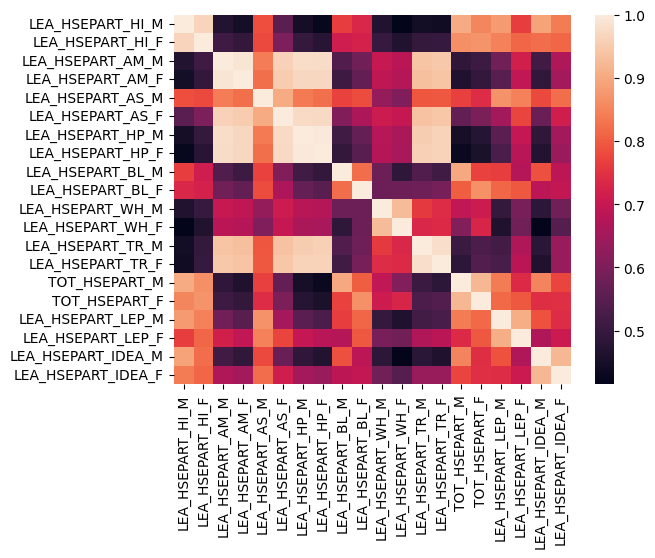

In [43]:
sns.heatmap(data.loc[:, 'LEA_HSEPART_HI_M':].corr())

<Axes: >

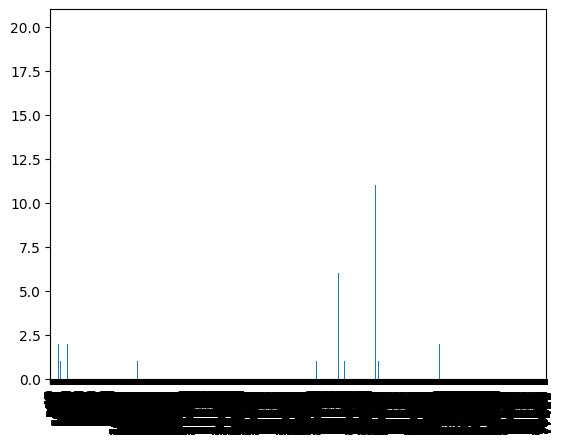

In [18]:
data.iloc[:, 16].plot.bar()

### SDGR

In [64]:
sdgr_path = '../Data/GRF17/GRF17/'

In [65]:
sdgr_folder = []
for currentPath, dirs, files in os.walk(sdgr_path):
    print(currentPath)
    if len(dirs) == 0 : # we are in deep
        sdgr_folder.append((currentPath, files))

../Data/GRF17/GRF17/


In [79]:
# conn = engine.connect()
for f in sdgr_folder[0][1]:
    if f.endswith('.xlsx'):
        dpath = os.path.join(sdgr_folder[0][0], f)
        data=pd.read_excel(dpath).astype(str)
        table_name = "".join(f.split()).strip().replace("-", "_")[:-5]
        data.to_sql(table_name, engine, index=False, schema='sdgr')
        # query = f'''ALTER TABLE sdgr."{table_name}" ADD PRIMARY KEY ("LEAID");'''
        # res = conn.execute(sqlalchemy.text(query))
# conn.commit()
# conn.close()